In [1]:
import os
import numpy as np
import pandas as pd
import mne
import torch
import torch.nn as nn  
import torch.optim as optim 
import matplotlib.pyplot as plt 
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
from scipy.signal import butter, filtfilt, welch
import requests
from tqdm import tqdm

DATA_DIR = "physionet_eeg_data"
os.makedirs(DATA_DIR, exist_ok=True)

sessions = [f"S{str(i).zfill(3)}" for i in range(1, 41)]  # 30 pacienți (20 antrenare, 10 validare)
recordings = ["R01", "R02", "R03", "R04"]  
base_url = "https://physionet.org/files/eegmmidb/1.0.0/"

def file_exists_on_server(url):
    response = requests.head(url)
    return response.status_code == 200

for session in tqdm(sessions, desc="Checking and Downloading EEG Data"):
    for recording in recordings:
        file_name = f"{session}{recording}.edf"
        file_url = f"{base_url}{session}/{file_name}"
        save_path = os.path.join(DATA_DIR, file_name)

        if file_exists_on_server(file_url):
            if not os.path.exists(save_path):
                try:
                    print(f"\nDownloading {file_name}...")
                    response = requests.get(file_url, stream=True)
                    with open(save_path, "wb") as f:
                        for chunk in response.iter_content(chunk_size=8192):
                            f.write(chunk)
                    print(f"\n {file_name} downloaded successfully.")
                except Exception as e:
                    print(f"\n⚠️ Error downloading {file_name}: {e}")
            else:
                print(f"\n{file_name} already exists, skipping.")
        else:
            print(f"\n {file_name} not found on the server, skipping.")

print("\n Download process completed!")

Checking and Downloading EEG Data:   0%|                 | 0/40 [00:00<?, ?it/s]


S001R01.edf already exists, skipping.

S001R02.edf already exists, skipping.

S001R03.edf already exists, skipping.


Checking and Downloading EEG Data:   2%|▏        | 1/40 [00:02<01:28,  2.26s/it]


S001R04.edf already exists, skipping.

S002R01.edf already exists, skipping.

S002R02.edf already exists, skipping.

S002R03.edf already exists, skipping.


Checking and Downloading EEG Data:   5%|▍        | 2/40 [00:04<01:25,  2.25s/it]


S002R04.edf already exists, skipping.

S003R01.edf already exists, skipping.

S003R02.edf already exists, skipping.

S003R03.edf already exists, skipping.


Checking and Downloading EEG Data:   8%|▋        | 3/40 [00:06<01:24,  2.27s/it]


S003R04.edf already exists, skipping.

S004R01.edf already exists, skipping.

S004R02.edf already exists, skipping.

S004R03.edf already exists, skipping.


Checking and Downloading EEG Data:  10%|▉        | 4/40 [00:09<01:21,  2.26s/it]


S004R04.edf already exists, skipping.

S005R01.edf already exists, skipping.

S005R02.edf already exists, skipping.

S005R03.edf already exists, skipping.


Checking and Downloading EEG Data:  12%|█▏       | 5/40 [00:11<01:18,  2.25s/it]


S005R04.edf already exists, skipping.

S006R01.edf already exists, skipping.

S006R02.edf already exists, skipping.

S006R03.edf already exists, skipping.


Checking and Downloading EEG Data:  15%|█▎       | 6/40 [00:13<01:16,  2.25s/it]


S006R04.edf already exists, skipping.

S007R01.edf already exists, skipping.

S007R02.edf already exists, skipping.

S007R03.edf already exists, skipping.


Checking and Downloading EEG Data:  18%|█▌       | 7/40 [00:15<01:14,  2.25s/it]


S007R04.edf already exists, skipping.

S008R01.edf already exists, skipping.

S008R02.edf already exists, skipping.

S008R03.edf already exists, skipping.


Checking and Downloading EEG Data:  20%|█▊       | 8/40 [00:18<01:12,  2.26s/it]


S008R04.edf already exists, skipping.

S009R01.edf already exists, skipping.

S009R02.edf already exists, skipping.

S009R03.edf already exists, skipping.


Checking and Downloading EEG Data:  22%|██       | 9/40 [00:20<01:10,  2.26s/it]


S009R04.edf already exists, skipping.

S010R01.edf already exists, skipping.

S010R02.edf already exists, skipping.

S010R03.edf already exists, skipping.


Checking and Downloading EEG Data:  25%|██      | 10/40 [00:22<01:07,  2.26s/it]


S010R04.edf already exists, skipping.

S011R01.edf already exists, skipping.

S011R02.edf already exists, skipping.

S011R03.edf already exists, skipping.


Checking and Downloading EEG Data:  28%|██▏     | 11/40 [00:24<01:05,  2.27s/it]


S011R04.edf already exists, skipping.

S012R01.edf already exists, skipping.

S012R02.edf already exists, skipping.

S012R03.edf already exists, skipping.


Checking and Downloading EEG Data:  30%|██▍     | 12/40 [00:27<01:03,  2.28s/it]


S012R04.edf already exists, skipping.

S013R01.edf already exists, skipping.

S013R02.edf already exists, skipping.

S013R03.edf already exists, skipping.


Checking and Downloading EEG Data:  32%|██▌     | 13/40 [00:29<01:01,  2.28s/it]


S013R04.edf already exists, skipping.

S014R01.edf already exists, skipping.

S014R02.edf already exists, skipping.

S014R03.edf already exists, skipping.


Checking and Downloading EEG Data:  35%|██▊     | 14/40 [00:31<00:59,  2.28s/it]


S014R04.edf already exists, skipping.

S015R01.edf already exists, skipping.

S015R02.edf already exists, skipping.

S015R03.edf already exists, skipping.


Checking and Downloading EEG Data:  38%|███     | 15/40 [00:34<00:57,  2.31s/it]


S015R04.edf already exists, skipping.

S016R01.edf already exists, skipping.

S016R02.edf already exists, skipping.

S016R03.edf already exists, skipping.


Checking and Downloading EEG Data:  40%|███▏    | 16/40 [00:36<00:55,  2.30s/it]


S016R04.edf already exists, skipping.

S017R01.edf already exists, skipping.

S017R02.edf already exists, skipping.

S017R03.edf already exists, skipping.


Checking and Downloading EEG Data:  42%|███▍    | 17/40 [00:39<01:01,  2.67s/it]


S017R04.edf already exists, skipping.

S018R01.edf already exists, skipping.

S018R02.edf already exists, skipping.

S018R03.edf already exists, skipping.


Checking and Downloading EEG Data:  45%|███▌    | 18/40 [00:42<00:58,  2.65s/it]


S018R04.edf already exists, skipping.

S019R01.edf already exists, skipping.

S019R02.edf already exists, skipping.

S019R03.edf already exists, skipping.


Checking and Downloading EEG Data:  48%|███▊    | 19/40 [00:44<00:53,  2.55s/it]


S019R04.edf already exists, skipping.

S020R01.edf already exists, skipping.

S020R02.edf already exists, skipping.

S020R03.edf already exists, skipping.


Checking and Downloading EEG Data:  50%|████    | 20/40 [00:48<00:55,  2.76s/it]


S020R04.edf already exists, skipping.

S021R01.edf already exists, skipping.

S021R02.edf already exists, skipping.

S021R03.edf already exists, skipping.


Checking and Downloading EEG Data:  52%|████▏   | 21/40 [00:50<00:50,  2.64s/it]


S021R04.edf already exists, skipping.

S022R01.edf already exists, skipping.

S022R02.edf already exists, skipping.

S022R03.edf already exists, skipping.


Checking and Downloading EEG Data:  55%|████▍   | 22/40 [00:52<00:45,  2.55s/it]


S022R04.edf already exists, skipping.

S023R01.edf already exists, skipping.

S023R02.edf already exists, skipping.

S023R03.edf already exists, skipping.


Checking and Downloading EEG Data:  57%|████▌   | 23/40 [00:55<00:42,  2.50s/it]


S023R04.edf already exists, skipping.

S024R01.edf already exists, skipping.

S024R02.edf already exists, skipping.

S024R03.edf already exists, skipping.


Checking and Downloading EEG Data:  60%|████▊   | 24/40 [00:57<00:38,  2.43s/it]


S024R04.edf already exists, skipping.

S025R01.edf already exists, skipping.

S025R02.edf already exists, skipping.

S025R03.edf already exists, skipping.


Checking and Downloading EEG Data:  62%|█████   | 25/40 [00:59<00:35,  2.39s/it]


S025R04.edf already exists, skipping.

S026R01.edf already exists, skipping.

S026R02.edf already exists, skipping.

S026R03.edf already exists, skipping.


Checking and Downloading EEG Data:  65%|█████▏  | 26/40 [01:02<00:33,  2.39s/it]


S026R04.edf already exists, skipping.

S027R01.edf already exists, skipping.

S027R02.edf already exists, skipping.

S027R03.edf already exists, skipping.


Checking and Downloading EEG Data:  68%|█████▍  | 27/40 [01:04<00:30,  2.37s/it]


S027R04.edf already exists, skipping.

S028R01.edf already exists, skipping.

S028R02.edf already exists, skipping.

S028R03.edf already exists, skipping.


Checking and Downloading EEG Data:  70%|█████▌  | 28/40 [01:06<00:28,  2.34s/it]


S028R04.edf already exists, skipping.

S029R01.edf already exists, skipping.

S029R02.edf already exists, skipping.

S029R03.edf already exists, skipping.


Checking and Downloading EEG Data:  72%|█████▊  | 29/40 [01:09<00:26,  2.43s/it]


S029R04.edf already exists, skipping.

S030R01.edf already exists, skipping.

S030R02.edf already exists, skipping.

S030R03.edf already exists, skipping.


Checking and Downloading EEG Data:  75%|██████  | 30/40 [01:11<00:23,  2.37s/it]


S030R04.edf already exists, skipping.

S031R01.edf already exists, skipping.

S031R02.edf already exists, skipping.

S031R03.edf already exists, skipping.


Checking and Downloading EEG Data:  78%|██████▏ | 31/40 [01:13<00:21,  2.36s/it]


S031R04.edf already exists, skipping.

S032R01.edf already exists, skipping.

S032R02.edf already exists, skipping.

S032R03.edf already exists, skipping.


Checking and Downloading EEG Data:  80%|██████▍ | 32/40 [01:16<00:18,  2.36s/it]


S032R04.edf already exists, skipping.

S033R01.edf already exists, skipping.

S033R02.edf already exists, skipping.

S033R03.edf already exists, skipping.


Checking and Downloading EEG Data:  82%|██████▌ | 33/40 [01:18<00:16,  2.34s/it]


S033R04.edf already exists, skipping.

S034R01.edf already exists, skipping.

S034R02.edf already exists, skipping.

S034R03.edf already exists, skipping.


Checking and Downloading EEG Data:  85%|██████▊ | 34/40 [01:20<00:13,  2.33s/it]


S034R04.edf already exists, skipping.

S035R01.edf already exists, skipping.

S035R02.edf already exists, skipping.

S035R03.edf already exists, skipping.


Checking and Downloading EEG Data:  88%|███████ | 35/40 [01:23<00:11,  2.32s/it]


S035R04.edf already exists, skipping.

S036R01.edf already exists, skipping.

S036R02.edf already exists, skipping.

S036R03.edf already exists, skipping.


Checking and Downloading EEG Data:  90%|███████▏| 36/40 [01:26<00:10,  2.61s/it]


S036R04.edf already exists, skipping.

S037R01.edf already exists, skipping.

S037R02.edf already exists, skipping.

S037R03.edf already exists, skipping.


Checking and Downloading EEG Data:  92%|███████▍| 37/40 [01:28<00:07,  2.50s/it]


S037R04.edf already exists, skipping.

S038R01.edf already exists, skipping.

S038R02.edf already exists, skipping.

S038R03.edf already exists, skipping.


Checking and Downloading EEG Data:  95%|███████▌| 38/40 [01:30<00:04,  2.42s/it]


S038R04.edf already exists, skipping.

S039R01.edf already exists, skipping.

S039R02.edf already exists, skipping.

S039R03.edf already exists, skipping.


Checking and Downloading EEG Data:  98%|███████▊| 39/40 [01:33<00:02,  2.37s/it]


S039R04.edf already exists, skipping.

S040R01.edf already exists, skipping.

S040R02.edf already exists, skipping.

S040R03.edf already exists, skipping.


Checking and Downloading EEG Data: 100%|████████| 40/40 [01:35<00:00,  2.39s/it]


S040R04.edf already exists, skipping.

 Download process completed!


In [2]:
file_list = sorted([f for f in os.listdir(DATA_DIR) if f.endswith(".edf")])
selected_channels = ["Fc5", "Fc3", "Fc1", "FCz"]  

X, y = [], []  
sfreq = 160 

for file_name in file_list:
    file_path = os.path.join(DATA_DIR, file_name)
    raw = mne.io.read_raw_edf(file_path, preload=True)
    available_channels = raw.ch_names
    selected_channels = [ch for ch in selected_channels if ch in available_channels]
    available_channels = raw.ch_names
    selected_channels = [ch for ch in selected_channels if ch in available_channels]

    if len(selected_channels) == 0:
        print(f"Avertisment: Niciun canal din {selected_channels} nu este disponibil în {file_name}. Se vor folosi toate canalele disponibile.")
        selected_channels = available_channels  # Se folosesc toate canalele

    raw.pick(selected_channels)

    
    events, event_id = mne.events_from_annotations(raw)
    data, _ = raw[:]
    
    for event in events:
        start_sample = event[0]
        label = event[2]  # 0 = repaus, 1 = mișcare stângă, 2 = mișcare dreaptă
        segment = data[:, start_sample:start_sample + sfreq] if start_sample + sfreq <= data.shape[1] else None
        if segment is not None:
            X.append(segment)
            y.append(label)

X = np.array(X)
y = np.array(y)


Extracting EDF parameters from /Users/carlabarastean/physionet_eeg_data/S001R01.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 9759  =      0.000 ...    60.994 secs...
Avertisment: Niciun canal din [] nu este disponibil în S001R01.edf. Se vor folosi toate canalele disponibile.
Used Annotations descriptions: [np.str_('T0')]
Extracting EDF parameters from /Users/carlabarastean/physionet_eeg_data/S001R02.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 9759  =      0.000 ...    60.994 secs...
Used Annotations descriptions: [np.str_('T0')]
Extracting EDF parameters from /Users/carlabarastean/physionet_eeg_data/S001R03.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Used Annotations descriptions: [np.str_('T0'), np.str_('T1'), np.str_('T2')]
Extracting EDF parameters from /Users/carla

/var/folders/8w/j7g9fl_1389dppqnm81p35540000gn/T/ipykernel_3208/1838509164.py:9: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_edf(file_path, preload=True)
/var/folders/8w/j7g9fl_1389dppqnm81p35540000gn/T/ipykernel_3208/1838509164.py:9: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_edf(file_path, preload=True)


Reading 0 ... 9759  =      0.000 ...    60.994 secs...
Used Annotations descriptions: [np.str_('T0')]
Extracting EDF parameters from /Users/carlabarastean/physionet_eeg_data/S106R02.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 9759  =      0.000 ...    60.994 secs...
Used Annotations descriptions: [np.str_('T0')]
Extracting EDF parameters from /Users/carlabarastean/physionet_eeg_data/S106R03.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Used Annotations descriptions: [np.str_('T0'), np.str_('T1'), np.str_('T2')]
Extracting EDF parameters from /Users/carlabarastean/physionet_eeg_data/S106R04.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Used Annotations descriptions: [np.str_('T0'), np.str_('T1'), np.str_('T2')]
Extracting EDF param

In [3]:
def band_pass_filter(data, lowcut, highcut, fs, order=4):
    nyquist = 0.5 * fs
    low = lowcut / nyquist
    high = highcut / nyquist
    b, a = butter(order, [low, high], btype='band')

    if data.shape[2] <= len(b):  
        print(f"Esantioane insuficiente pentru filtrare! Dimensiune: {data.shape[2]}")
        return data  

    return filtfilt(b, a, data, axis=2)  

X_filtered = band_pass_filter(X, 7.5, 30, sfreq)

print(f"Forma X filtrat: {X_filtered.shape}")
print(f"Media semnalului filtrat: {np.mean(X_filtered)}")
print(f"Deviatia standard a semnalului filtrat: {np.std(X_filtered)}")


Forma X filtrat: (6794, 64, 160)
Media semnalului filtrat: 3.3327654987485205e-09
Deviatia standard a semnalului filtrat: 1.7631782004011403e-05


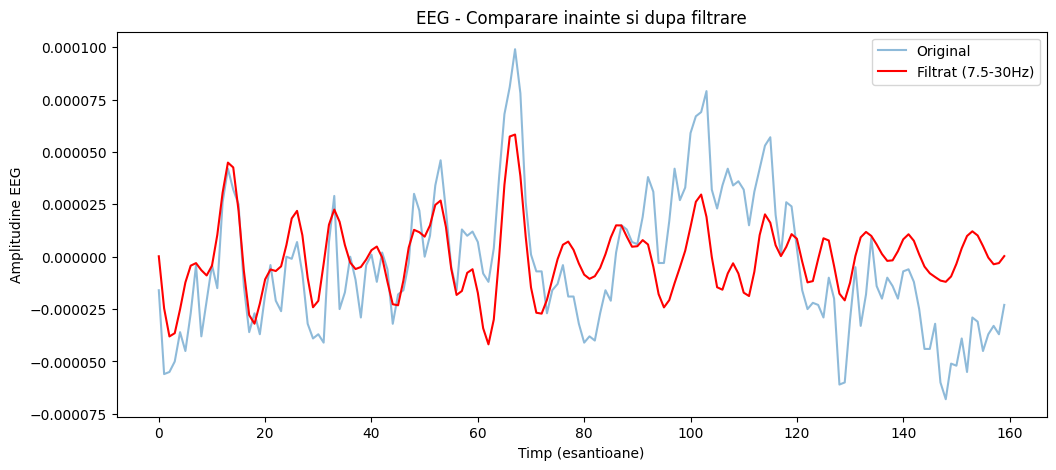

In [4]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))
plt.plot(X[0, 0, :], label="Original", alpha=0.5)
plt.plot(X_filtered[0, 0, :], label="Filtrat (7.5-30Hz)", color="red")
plt.xlabel("Timp (esantioane)")
plt.ylabel("Amplitudine EEG")
plt.title("EEG - Comparare inainte si dupa filtrare")
plt.legend()
plt.show()


In [5]:
# 4. Normalizare 
X_normalized = (X_filtered - np.mean(X_filtered, axis=2, keepdims=True)) / np.std(X_filtered, axis=2, keepdims=True)

y = np.array(y) - 1  

X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=20/40, random_state=42)

X_train = torch.tensor(X_train, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.long)
y_test = torch.tensor(y_test, dtype=torch.long)

train_dataset = TensorDataset(X_train, y_train)
test_dataset = TensorDataset(X_test, y_test)
train_loader = DataLoader(train_dataset, batch_size=4, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=4, shuffle=False)

print(f"Etichete unice în y_train: {np.unique(y_train.numpy())}")
print(f"Etichete unice în y_test: {np.unique(y_test.numpy())}")



Etichete unice în y_train: [0 1 2]
Etichete unice în y_test: [0 1 2]


In [6]:
class EEGCNN(nn.Module):
    def __init__(self, num_channels=64):  
        super(EEGCNN, self).__init__()
        self.conv1 = nn.Conv1d(num_channels, 16, kernel_size=3, padding=1)
        self.bn1 = nn.BatchNorm1d(16)
        self.pool1 = nn.MaxPool1d(2, 2)
        self.conv2 = nn.Conv1d(16, 32, kernel_size=3, padding=1)
        self.bn2 = nn.BatchNorm1d(32)
        self.pool2 = nn.MaxPool1d(2, 2)
        self.fc1 = nn.Linear(32 * 40, 64)
        self.fc2 = nn.Linear(64, 3) 
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(0.3)

    def forward(self, x):
        x = self.relu(self.bn1(self.conv1(x)))
        x = self.pool1(x)
        x = self.relu(self.bn2(self.conv2(x)))
        x = self.pool2(x)
        x = x.view(x.size(0), -1)
        x = self.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)
        return x

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = EEGCNN(num_channels=64).to(device) 


In [7]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = EEGCNN().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

num_epochs = 10
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    avg_loss = running_loss / len(train_loader)
    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {avg_loss:.4f}")

print(" Antrenare completa!")

Epoch 1/10, Loss: 1.0202
Epoch 2/10, Loss: 0.9626
Epoch 3/10, Loss: 0.9318
Epoch 4/10, Loss: 0.8962
Epoch 5/10, Loss: 0.8640
Epoch 6/10, Loss: 0.8510
Epoch 7/10, Loss: 0.8198
Epoch 8/10, Loss: 0.7882
Epoch 9/10, Loss: 0.7689
Epoch 10/10, Loss: 0.7419
 Antrenare completa!



 Acuratetea pe setul de test: 56.14%


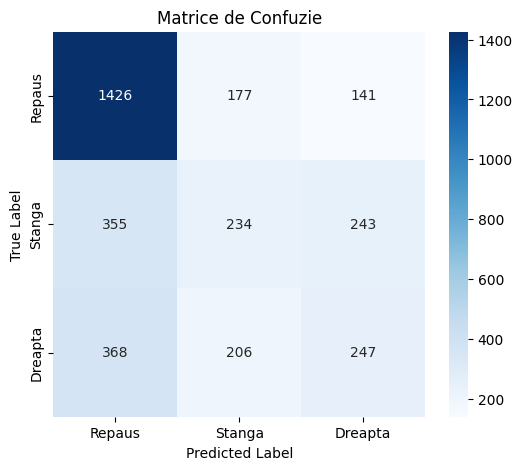


 Raport Clasificare:
                  precision    recall  f1-score   support

         Repaus       0.66      0.82      0.73      1744
 Miscare Stanga       0.38      0.28      0.32       832
Miscare Dreapta       0.39      0.30      0.34       821

       accuracy                           0.56      3397
      macro avg       0.48      0.47      0.47      3397
   weighted avg       0.53      0.56      0.54      3397



In [8]:
model.eval()
correct = 0
total = 0
all_preds = []
all_labels = []

with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)
        correct += (predicted == labels).sum().item()
        total += labels.size(0)

        all_preds.extend(predicted.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

accuracy = correct / total * 100
print(f"\n Acuratetea pe setul de test: {accuracy:.2f}%")


from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

conf_matrix = confusion_matrix(all_labels, all_preds)
plt.figure(figsize=(6,5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Repaus", "Stanga", "Dreapta"], yticklabels=["Repaus", "Stanga", "Dreapta"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Matrice de Confuzie")
plt.show()

print("\n Raport Clasificare:\n", classification_report(all_labels, all_preds, target_names=["Repaus", "Miscare Stanga", "Miscare Dreapta"]))


In [9]:
all_preds = []
all_labels = []

class ImprovedEEGCNN(nn.Module):
    def __init__(self, num_channels=4):
        super(ImprovedEEGCNN, self).__init__()
        self.conv1 = nn.Conv1d(num_channels, 32, kernel_size=5, padding=2)
        self.bn1 = nn.BatchNorm1d(32)
        self.pool1 = nn.MaxPool1d(2, 2)
        
        self.conv2 = nn.Conv1d(32, 64, kernel_size=5, padding=2)
        self.bn2 = nn.BatchNorm1d(64)
        self.pool2 = nn.MaxPool1d(2, 2)
        
        self.conv3 = nn.Conv1d(64, 128, kernel_size=5, padding=2)
        self.bn3 = nn.BatchNorm1d(128)
        self.pool3 = nn.MaxPool1d(2, 2)
        
        self.fc1 = nn.Linear(128 * 20, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 3)  # 3 clase
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(0.3)

    def forward(self, x):
        x = self.relu(self.bn1(self.conv1(x)))
        x = self.pool1(x)
        x = self.relu(self.bn2(self.conv2(x)))
        x = self.pool2(x)
        x = self.relu(self.bn3(self.conv3(x)))
        x = self.pool3(x)
        x = x.view(x.size(0), -1)
        x = self.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.relu(self.fc2(x))
        x = self.fc3(x)
        return x

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = ImprovedEEGCNN().to(device)


In [10]:
print(f" Forma X_train: {X_train.shape}")  
print(f" Forma X_test: {X_test.shape}")   

if X_filtered.shape[1] != 4:
    X_filtered = X_filtered[:, :4, :] 
    print(f"NOUA Forma X_filtered: {X_filtered.shape}") 

X_normalized = (X_filtered - np.mean(X_filtered, axis=2, keepdims=True)) / np.std(X_filtered, axis=2, keepdims=True)
print(f"X_normalized shape: {X_normalized.shape}") 


X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=20/40, random_state=42)

X_train = torch.tensor(X_train, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.long)
y_test = torch.tensor(y_test, dtype=torch.long)

print(f" Forma X_train: {X_train.shape}")  
print(f" Forma X_test: {X_test.shape}")

train_dataset = TensorDataset(X_train, y_train)
test_dataset = TensorDataset(X_test, y_test)
train_loader = DataLoader(train_dataset, batch_size=4, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=4, shuffle=False)




 Forma X_train: torch.Size([3397, 64, 160])
 Forma X_test: torch.Size([3397, 64, 160])
NOUA Forma X_filtered: (6794, 4, 160)
X_normalized shape: (6794, 4, 160)
 Forma X_train: torch.Size([3397, 4, 160])
 Forma X_test: torch.Size([3397, 4, 160])


In [11]:

num_epochs = 10
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0

    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)


        assert inputs.shape[1] == 4, f" Eroare: Modelul asteaptă 4 canale, dar a primit {inputs.shape[1]}"

        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
    
    avg_loss = running_loss / len(train_loader)
    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {avg_loss:.4f}")

print("Antrenare completa dupa corectarea canalelor!")


Epoch 1/10, Loss: 1.1048
Epoch 2/10, Loss: 1.1063
Epoch 3/10, Loss: 1.1072
Epoch 4/10, Loss: 1.1060
Epoch 5/10, Loss: 1.1047
Epoch 6/10, Loss: 1.1042
Epoch 7/10, Loss: 1.1053
Epoch 8/10, Loss: 1.1077
Epoch 9/10, Loss: 1.1047
Epoch 10/10, Loss: 1.1049
Antrenare completa dupa corectarea canalelor!


In [12]:
def compute_spectrogram(data, fs=160, nperseg=40):
    spectrograms = []
    for trial in data:
        trial_spec = []
        for channel in trial:
            freqs, psd = welch(channel, fs=fs, nperseg=nperseg)
            trial_spec.append(psd)
        spectrograms.append(trial_spec)
    return np.array(spectrograms)

X_spec_train = compute_spectrogram(X_train.numpy())
X_spec_test = compute_spectrogram(X_test.numpy())

X_spec_train = torch.tensor(X_spec_train, dtype=torch.float32)
X_spec_test = torch.tensor(X_spec_test, dtype=torch.float32)

print(f"Noua forma a X_train (Spectrograma): {X_spec_train.shape}")
print(f"Noua forma a X_test (Spectrograma): {X_spec_test.shape}")


Noua forma a X_train (Spectrograma): torch.Size([3397, 4, 21])
Noua forma a X_test (Spectrograma): torch.Size([3397, 4, 21])


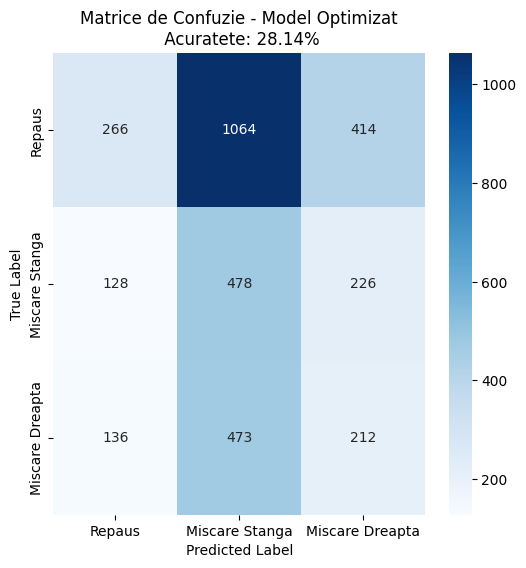


 Acuratetea modelului optimizat: 28.14%

Raport Clasificare:

                 precision    recall  f1-score   support

         Repaus       0.50      0.15      0.23      1744
 Miscare Stanga       0.24      0.57      0.34       832
Miscare Dreapta       0.25      0.26      0.25       821

       accuracy                           0.28      3397
      macro avg       0.33      0.33      0.27      3397
   weighted avg       0.38      0.28      0.26      3397



In [13]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

model.eval()
y_true, y_pred = [], []

with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        _, preds = torch.max(outputs, 1)
        y_true.extend(labels.cpu().numpy())
        y_pred.extend(preds.cpu().numpy())

accuracy = accuracy_score(y_true, y_pred) * 100

cm = confusion_matrix(y_true, y_pred)
class_names = ["Repaus", "Miscare Stanga", "Miscare Dreapta"]

plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title(f"Matrice de Confuzie - Model Optimizat\n Acuratete: {accuracy:.2f}%")
plt.show()


print(f"\n Acuratetea modelului optimizat: {accuracy:.2f}%")
print("\nRaport Clasificare:\n")
print(classification_report(y_true, y_pred, target_names=class_names))


Epoch 1/15, Loss: 1.0480
Epoch 2/15, Loss: 1.0103
Epoch 3/15, Loss: 1.0010
Epoch 4/15, Loss: 0.9826
Epoch 5/15, Loss: 0.9680
Epoch 6/15, Loss: 0.9537
Epoch 7/15, Loss: 0.9147
Epoch 8/15, Loss: 0.8890
Epoch 9/15, Loss: 0.8400
Epoch 10/15, Loss: 0.7920
Epoch 11/15, Loss: 0.7036
Epoch 12/15, Loss: 0.6310
Epoch 13/15, Loss: 0.5546
Epoch 14/15, Loss: 0.4763
Epoch 15/15, Loss: 0.3930
 Antrenare completa pentru modelul optimizat!


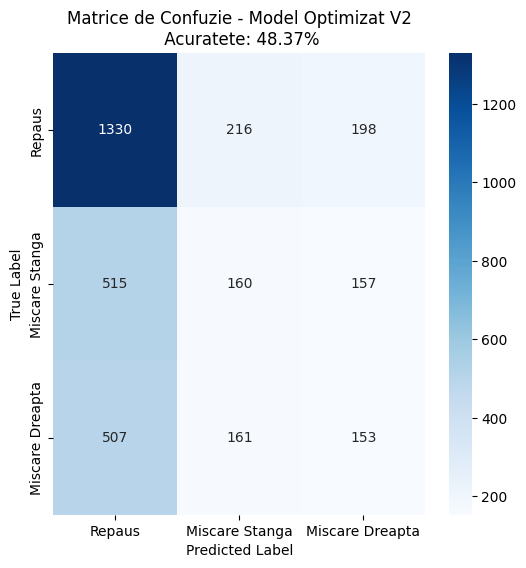


 Acuratetea modelului optimizat: 48.37%

Raport Clasificare:

                 precision    recall  f1-score   support

         Repaus       0.57      0.76      0.65      1744
 Miscare Stanga       0.30      0.19      0.23       832
Miscare Dreapta       0.30      0.19      0.23       821

       accuracy                           0.48      3397
      macro avg       0.39      0.38      0.37      3397
   weighted avg       0.44      0.48      0.45      3397



In [14]:
class OptimizedEEGCNN(nn.Module):
    def __init__(self, num_channels=4):
        super(OptimizedEEGCNN, self).__init__()
        self.conv1 = nn.Conv1d(num_channels, 32, kernel_size=3, padding=1)
        self.bn1 = nn.BatchNorm1d(32)
        self.pool1 = nn.MaxPool1d(2, 2)

        self.conv2 = nn.Conv1d(32, 64, kernel_size=3, padding=1)
        self.bn2 = nn.BatchNorm1d(64)
        self.pool2 = nn.MaxPool1d(2, 2)

        self.conv3 = nn.Conv1d(64, 128, kernel_size=3, padding=1)
        self.bn3 = nn.BatchNorm1d(128)
        self.pool3 = nn.MaxPool1d(2, 2)

        self.fc1 = nn.Linear(128 * 20, 128)
        self.dropout1 = nn.Dropout(0.4)
        self.fc2 = nn.Linear(128, 64)
        self.dropout2 = nn.Dropout(0.3)
        self.fc3 = nn.Linear(64, 3)  # 3 clase

        self.leaky_relu = nn.LeakyReLU(0.1)  # Înlocuim ReLU cu LeakyReLU

    def forward(self, x):
        x = self.leaky_relu(self.bn1(self.conv1(x)))
        x = self.pool1(x)
        x = self.leaky_relu(self.bn2(self.conv2(x)))
        x = self.pool2(x)
        x = self.leaky_relu(self.bn3(self.conv3(x)))
        x = self.pool3(x)
        x = x.view(x.size(0), -1)
        x = self.leaky_relu(self.fc1(x))
        x = self.dropout1(x)
        x = self.leaky_relu(self.fc2(x))
        x = self.dropout2(x)
        x = self.fc3(x)
        return x

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model_optimized = OptimizedEEGCNN().to(device)
optimizer = optim.Adam(model_optimized.parameters(), lr=0.0005)  # Micșorăm learning rate-ul
criterion = nn.CrossEntropyLoss()

num_epochs = 15 
batch_size = 8 
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

for epoch in range(num_epochs):
    model_optimized.train()
    running_loss = 0.0

    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model_optimized(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    avg_loss = running_loss / len(train_loader)
    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {avg_loss:.4f}")

print(" Antrenare completa pentru modelul optimizat!")

model_optimized.eval()
y_true, y_pred = [], []

with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model_optimized(inputs)
        _, preds = torch.max(outputs, 1)
        y_true.extend(labels.cpu().numpy())
        y_pred.extend(preds.cpu().numpy())

accuracy = accuracy_score(y_true, y_pred) * 100

cm = confusion_matrix(y_true, y_pred)
class_names = ["Repaus", "Miscare Stanga", "Miscare Dreapta"]

plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title(f"Matrice de Confuzie - Model Optimizat V2\n Acuratete: {accuracy:.2f}%")
plt.show()

print(f"\n Acuratetea modelului optimizat: {accuracy:.2f}%")
print("\nRaport Clasificare:\n")
print(classification_report(y_true, y_pred, target_names=class_names))


Epoch 1/25, Loss: 1.0536
Epoch 2/25, Loss: 1.0159
Epoch 3/25, Loss: 1.0109
Epoch 4/25, Loss: 0.9846
Epoch 5/25, Loss: 0.9700
Epoch 6/25, Loss: 0.9235
Epoch 7/25, Loss: 0.8847
Epoch 8/25, Loss: 0.8409
Epoch 9/25, Loss: 0.7805
Epoch 10/25, Loss: 0.7144
Epoch 11/25, Loss: 0.5383
Epoch 12/25, Loss: 0.4467
Epoch 13/25, Loss: 0.3838
Epoch 14/25, Loss: 0.3213
Epoch 15/25, Loss: 0.2619
Epoch 16/25, Loss: 0.1988
Epoch 17/25, Loss: 0.1660
Epoch 18/25, Loss: 0.1500
Epoch 19/25, Loss: 0.1237
Epoch 20/25, Loss: 0.1094
Epoch 21/25, Loss: 0.0819
Epoch 22/25, Loss: 0.0719
Epoch 23/25, Loss: 0.0632
Epoch 24/25, Loss: 0.0567
Epoch 25/25, Loss: 0.0537
Antrenare completa pentru modelul optimizat V3!


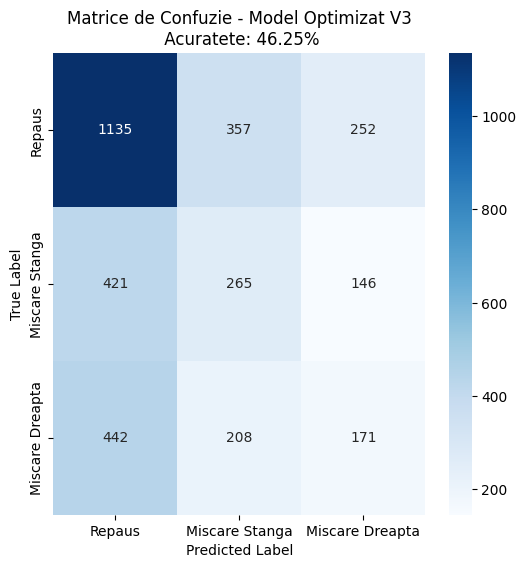


 Acuratetea modelului optimizat V3: 46.25%

Raport Clasificare:

                 precision    recall  f1-score   support

         Repaus       0.57      0.65      0.61      1744
 Miscare Stanga       0.32      0.32      0.32       832
Miscare Dreapta       0.30      0.21      0.25       821

       accuracy                           0.46      3397
      macro avg       0.40      0.39      0.39      3397
   weighted avg       0.44      0.46      0.45      3397



In [15]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim.lr_scheduler import StepLR
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

class AdvancedEEGCNN(nn.Module):
    def __init__(self, num_channels=4):  # Creștem la 8 canale
        super(AdvancedEEGCNN, self).__init__()
        self.conv1 = nn.Conv1d(num_channels, 64, kernel_size=7, padding=3)  # Kernel mai mare
        self.bn1 = nn.BatchNorm1d(64)
        self.pool1 = nn.MaxPool1d(2, 2)

        self.conv2 = nn.Conv1d(64, 128, kernel_size=5, padding=2)
        self.bn2 = nn.BatchNorm1d(128)
        self.pool2 = nn.MaxPool1d(2, 2)

        self.conv3 = nn.Conv1d(128, 256, kernel_size=3, padding=1)
        self.bn3 = nn.BatchNorm1d(256)
        self.pool3 = nn.MaxPool1d(2, 2)

        self.fc1 = nn.Linear(256 * 20, 256)
        self.dropout1 = nn.Dropout(0.5)
        self.fc2 = nn.Linear(256, 128)
        self.dropout2 = nn.Dropout(0.4)
        self.fc3 = nn.Linear(128, 3)  # 3 clase

        self.leaky_relu = nn.LeakyReLU(0.1)

    def forward(self, x):
        x = self.leaky_relu(self.bn1(self.conv1(x)))
        x = self.pool1(x)
        x = self.leaky_relu(self.bn2(self.conv2(x)))
        x = self.pool2(x)
        x = self.leaky_relu(self.bn3(self.conv3(x)))
        x = self.pool3(x)
        x = x.view(x.size(0), -1)
        x = self.leaky_relu(self.fc1(x))
        x = self.dropout1(x)
        x = self.leaky_relu(self.fc2(x))
        x = self.dropout2(x)
        x = self.fc3(x)
        return x

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model_advanced = AdvancedEEGCNN().to(device)
optimizer = optim.Adam(model_advanced.parameters(), lr=0.0003)  
scheduler = StepLR(optimizer, step_size=5, gamma=0.5)  
criterion = nn.CrossEntropyLoss()


num_epochs = 25  
batch_size = 16  
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

for epoch in range(num_epochs):
    model_advanced.train()
    running_loss = 0.0

    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model_advanced(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    scheduler.step()  # Reducem learning rate-ul

    avg_loss = running_loss / len(train_loader)
    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {avg_loss:.4f}")

print("Antrenare completa pentru modelul optimizat V3!")

model_advanced.eval()
y_true, y_pred = [], []

with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model_advanced(inputs)
        _, preds = torch.max(outputs, 1)
        y_true.extend(labels.cpu().numpy())
        y_pred.extend(preds.cpu().numpy())

accuracy = accuracy_score(y_true, y_pred) * 100

cm = confusion_matrix(y_true, y_pred)
class_names = ["Repaus", "Miscare Stanga", "Miscare Dreapta"]


plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title(f"Matrice de Confuzie - Model Optimizat V3\n Acuratete: {accuracy:.2f}%")
plt.show()

print(f"\n Acuratetea modelului optimizat V3: {accuracy:.2f}%")
print("\nRaport Clasificare:\n")
print(classification_report(y_true, y_pred, target_names=class_names))


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/torch/optim/lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


Epoch 1/50, Loss: 1.0371
📊 Acuratețea pe setul de test: 51.34%
Epoch 2/50, Loss: 1.0035
📊 Acuratețea pe setul de test: 51.34%
Epoch 3/50, Loss: 0.9872
📊 Acuratețea pe setul de test: 52.16%
Epoch 4/50, Loss: 0.9749
📊 Acuratețea pe setul de test: 51.22%
Epoch 5/50, Loss: 0.9596
📊 Acuratețea pe setul de test: 52.13%
Epoch 6/50, Loss: 0.9306
📊 Acuratețea pe setul de test: 51.99%
Epoch 7/50, Loss: 0.9048
📊 Acuratețea pe setul de test: 50.78%
Epoch 8/50, Loss: 0.8683
📊 Acuratețea pe setul de test: 50.52%
Epoch 9/50, Loss: 0.8260
📊 Acuratețea pe setul de test: 48.54%
Epoch 10/50, Loss: 0.7766
📊 Acuratețea pe setul de test: 47.72%
Early Stopping! Modelul nu s-a îmbunatatit timp de 7 epoci.
Antrenare completa!


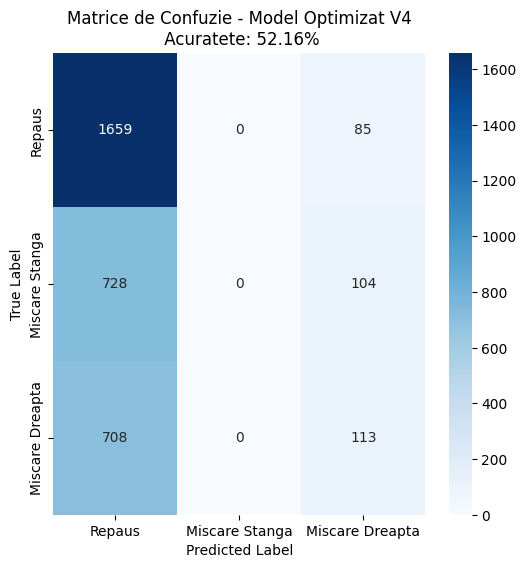


 Acuratetea modelului optimizat: 52.16%

Raport Clasificare:

                 precision    recall  f1-score   support

         Repaus       0.54      0.95      0.69      1744
 Miscare Stanga       0.00      0.00      0.00       832
Miscare Dreapta       0.37      0.14      0.20       821

       accuracy                           0.52      3397
      macro avg       0.30      0.36      0.30      3397
   weighted avg       0.37      0.52      0.40      3397



/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  

In [16]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim.lr_scheduler import ReduceLROnPlateau

class AdvancedEEGCNN(nn.Module):
    def __init__(self, num_channels=4):
        super(AdvancedEEGCNN, self).__init__()
        self.conv1 = nn.Conv1d(num_channels, 32, kernel_size=5, padding=2)
        self.bn1 = nn.BatchNorm1d(32)
        self.pool1 = nn.MaxPool1d(2, 2)
        
        self.conv2 = nn.Conv1d(32, 64, kernel_size=5, padding=2)
        self.bn2 = nn.BatchNorm1d(64)
        self.pool2 = nn.MaxPool1d(2, 2)
        
        self.conv3 = nn.Conv1d(64, 128, kernel_size=5, padding=2)
        self.bn3 = nn.BatchNorm1d(128)
        self.pool3 = nn.MaxPool1d(2, 2)
        
        self.fc1 = nn.Linear(128 * 20, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 3)  # 3 clase
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(0.3)

    def forward(self, x):
        x = self.relu(self.bn1(self.conv1(x)))
        x = self.pool1(x)
        x = self.relu(self.bn2(self.conv2(x)))
        x = self.pool2(x)
        x = self.relu(self.bn3(self.conv3(x)))
        x = self.pool3(x)
        x = x.view(x.size(0), -1)
        x = self.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.relu(self.fc2(x))
        x = self.fc3(x)
        return x

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = AdvancedEEGCNN().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
scheduler = ReduceLROnPlateau(optimizer, mode='min', factor=0.5, patience=5, verbose=True)

num_epochs = 50
best_accuracy = 0
patience = 7
patience_counter = 0

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0

    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
    
    avg_loss = running_loss / len(train_loader)
    scheduler.step(avg_loss)
    
    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {avg_loss:.4f}")

    model.eval()
    correct, total = 0, 0
    y_true, y_pred = [], []
    
    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)
            correct += (preds == labels).sum().item()
            total += labels.size(0)
            y_true.extend(labels.cpu().numpy())
            y_pred.extend(preds.cpu().numpy())

    accuracy = correct / total * 100
    print(f"📊 Acuratețea pe setul de test: {accuracy:.2f}%")

    # Early Stopping
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        patience_counter = 0
        torch.save(model.state_dict(), "best_model.pth")  
    else:
        patience_counter += 1

    if patience_counter >= patience:
        print("Early Stopping! Modelul nu s-a îmbunatatit timp de 7 epoci.")
        break

print("Antrenare completa!")

from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

model.load_state_dict(torch.load("best_model.pth"))
model.eval()
y_true, y_pred = [], []

with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        _, preds = torch.max(outputs, 1)
        y_true.extend(labels.cpu().numpy())
        y_pred.extend(preds.cpu().numpy())

accuracy = accuracy_score(y_true, y_pred) * 100

cm = confusion_matrix(y_true, y_pred)
class_names = ["Repaus", "Miscare Stanga", "Miscare Dreapta"]

plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title(f"Matrice de Confuzie - Model Optimizat V4\n Acuratete: {accuracy:.2f}%")
plt.show()

print(f"\n Acuratetea modelului optimizat: {accuracy:.2f}%")
print("\nRaport Clasificare:\n")
print(classification_report(y_true, y_pred, target_names=class_names))
